CELL 1 Import Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
import joblib
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

✓ Libraries imported successfully!
TensorFlow version: 2.19.0


CELL 2 Load Dataset

In [12]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch dataset
automobile = fetch_ucirepo(id=10)

# Combine features and target
df = pd.concat([automobile.data.features, automobile.data.targets], axis=1)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns:\n{df.columns.tolist()}")
df.head()

Dataset shape: (205, 26)

Columns:
['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size', 'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses', 'symboling']


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


CELL 3 Data Overview

In [13]:
print("=== DATASET INFO ===")
print(df.info())

print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
})
print(missing_df.sort_values('Percentage', ascending=False))

print("\n=== PRICE STATISTICS ===")
print(df['price'].describe())

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel

CELL 4: Visualisasi 1 - Distribusi Harga

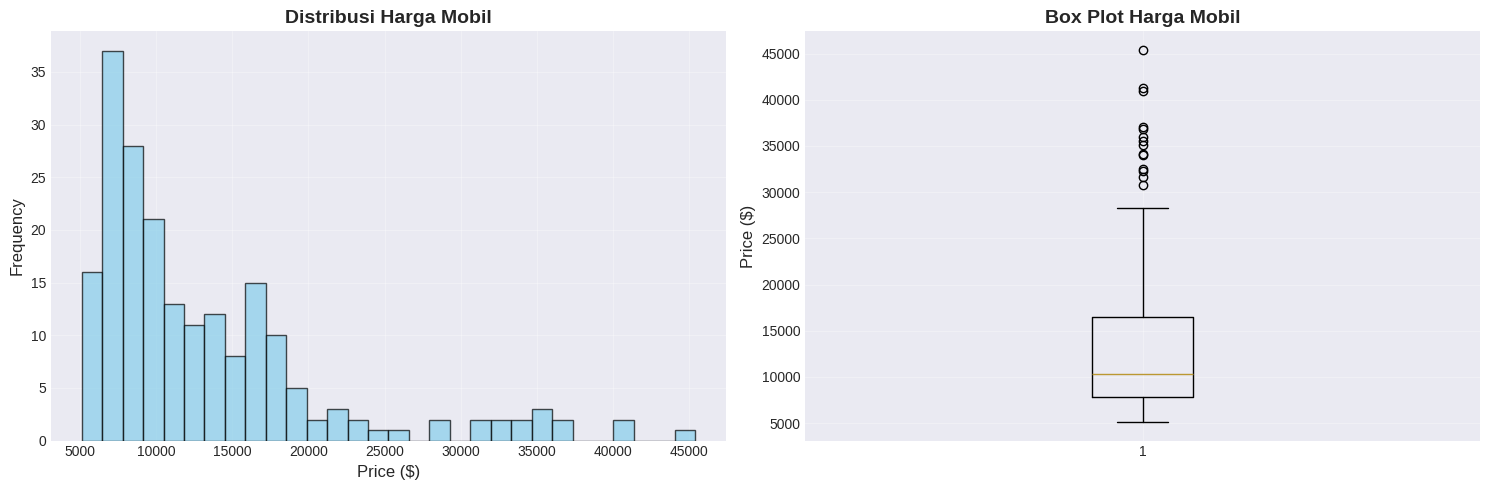

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['price'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribusi Harga Mobil', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['price'].dropna())
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].set_title('Box Plot Harga Mobil', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

CELL 5: Visualisasi 2 - Korelasi dengan Harga

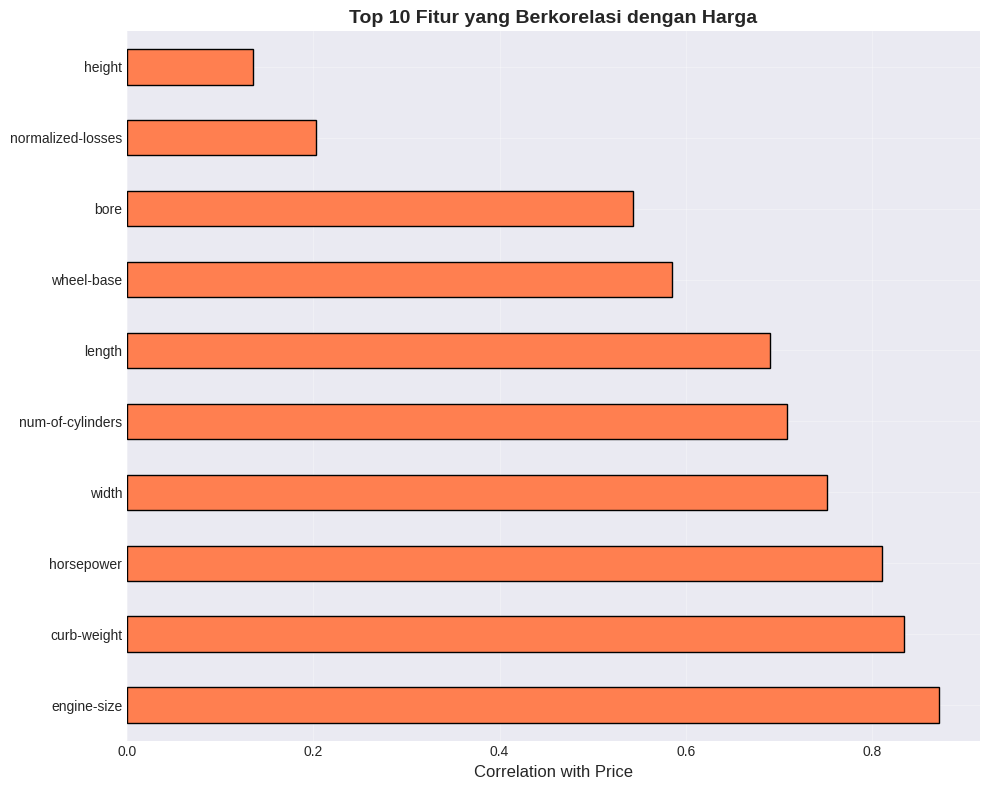

Top 10 Correlations with Price:
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
num-of-cylinders     0.708645
length               0.690628
wheel-base           0.584642
bore                 0.543436
normalized-losses    0.203254
height               0.135486
Name: price, dtype: float64


In [15]:
# Hitung korelasi
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['price'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
correlations[1:11].plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Correlation with Price', fontsize=12)
plt.title('Top 10 Fitur yang Berkorelasi dengan Harga', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 10 Correlations with Price:")
print(correlations[1:11])

CELL 6: Visualisasi 3 - Heatmap Korelasi

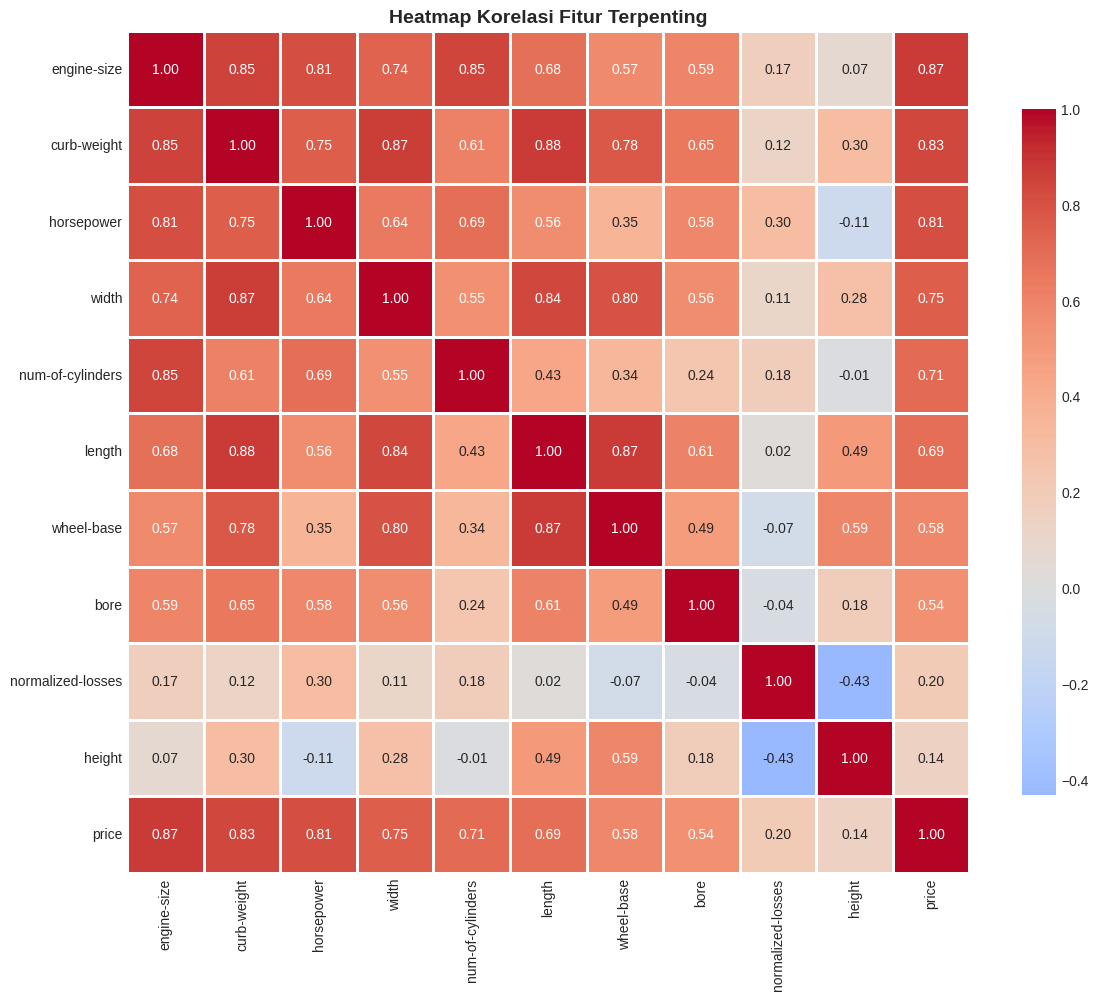

In [16]:
# Pilih top features
top_corr_features = correlations[1:11].index.tolist() + ['price']
corr_matrix = df[top_corr_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap Korelasi Fitur Terpenting', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

CELL 7: Visualisasi 4 - Scatter Plot

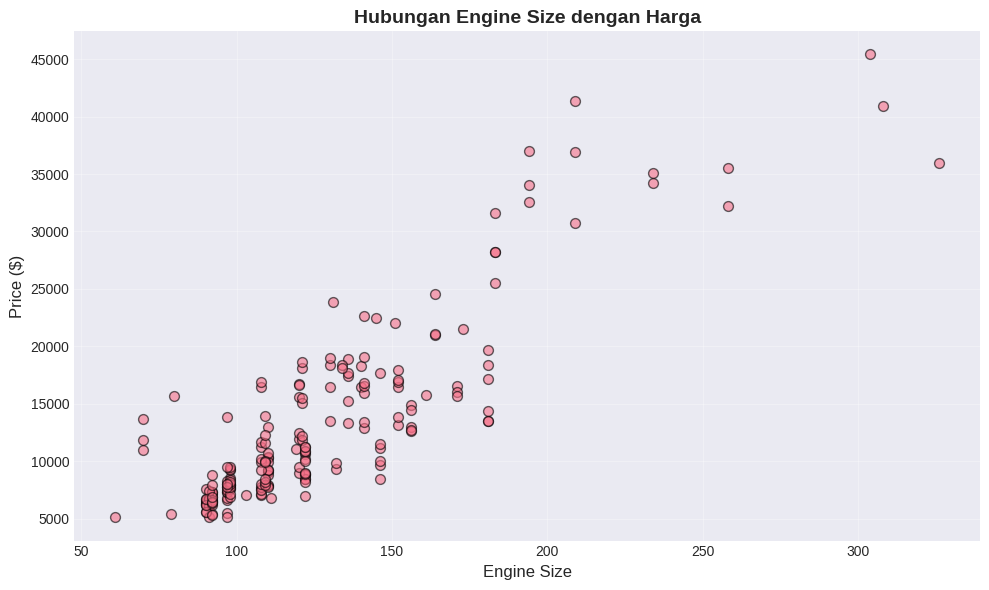

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine-size'], df['price'], alpha=0.6, edgecolors='black', s=50)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Hubungan Engine Size dengan Harga', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

CELL 8: Data Preprocessing

In [18]:
# Handle missing values
df_clean = df.dropna(subset=['price'])

# Select numeric features
numeric_features = ['symboling', 'normalized-losses', 'wheel-base', 'length',
                   'width', 'height', 'curb-weight', 'engine-size',
                   'bore', 'stroke', 'compression-ratio', 'horsepower',
                   'peak-rpm', 'city-mpg', 'highway-mpg']

available_features = [f for f in numeric_features if f in df_clean.columns]

# Prepare X and y
X = df_clean[available_features].copy()
y = df_clean['price'].copy()

# Drop rows with missing values
valid_idx = X.notna().all(axis=1)
X = X[valid_idx]
y = y[valid_idx]

print(f"Features used: {len(available_features)}")
print(f"Final data shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features used: 15
Final data shape: (160, 15)
Target shape: (160,)


CELL 9: Train-Test Split & Scaling

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 128 samples
Testing set: 32 samples


CELL 10: Model 1 - Linear Regression

In [20]:
print("="*60)
print("MODEL 1: LINEAR REGRESSION")
print("="*60)

# Train
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Evaluate
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_train_r2 = r2_score(y_train, y_pred_lr_train)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)
lr_test_mae = mean_absolute_error(y_test, y_pred_lr_test)

print(f"\nTrain RMSE: ${lr_train_rmse:,.2f}")
print(f"Test RMSE:  ${lr_test_rmse:,.2f}")
print(f"Train R²:   {lr_train_r2:.4f}")
print(f"Test R²:    {lr_test_r2:.4f}")
print(f"Test MAE:   ${lr_test_mae:,.2f}")

joblib.dump(lr_model, 'linear_regression_model.pkl')

MODEL 1: LINEAR REGRESSION

Train RMSE: $2,299.19
Test RMSE:  $2,342.05
Train R²:   0.8639
Test R²:    0.5783
Test MAE:   $1,857.26


['linear_regression_model.pkl']

CELL 11: Model 2 - Random Forest


In [21]:
print("="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)

# Train
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluate
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
rf_train_r2 = r2_score(y_train, y_pred_rf_train)
rf_test_r2 = r2_score(y_test, y_pred_rf_test)
rf_test_mae = mean_absolute_error(y_test, y_pred_rf_test)

print(f"\nTrain RMSE: ${rf_train_rmse:,.2f}")
print(f"Test RMSE:  ${rf_test_rmse:,.2f}")
print(f"Train R²:   {rf_train_r2:.4f}")
print(f"Test R²:    {rf_test_r2:.4f}")
print(f"Test MAE:   ${rf_test_mae:,.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 Feature Importance:")
print(feature_importance.head())

joblib.dump(rf_model, 'random_forest_model.pkl')

MODEL 2: RANDOM FOREST REGRESSOR

Train RMSE: $780.78
Test RMSE:  $1,696.53
Train R²:   0.9843
Test R²:    0.7787
Test MAE:   $1,186.26

Top 5 Feature Importance:
        feature  importance
6   curb-weight    0.535104
14  highway-mpg    0.120170
4         width    0.086539
7   engine-size    0.078143
3        length    0.042821


['random_forest_model.pkl']

CELL 12: Model 3 - Deep Learning

In [27]:
print("="*60)
print("MODEL 3: DEEP LEARNING (NEURAL NETWORK)")
print("="*60)

# Build model
dl_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile
dl_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Train
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Predict
y_pred_dl_train = dl_model.predict(X_train_scaled, verbose=0).flatten()
y_pred_dl_test = dl_model.predict(X_test_scaled, verbose=0).flatten()

# Evaluate
dl_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_dl_train))
dl_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dl_test))
dl_train_r2 = r2_score(y_train, y_pred_dl_train)
dl_test_r2 = r2_score(y_test, y_pred_dl_test)
dl_test_mae = mean_absolute_error(y_test, y_pred_dl_test)

print(f"\nTrain RMSE: ${dl_train_rmse:,.2f}")
print(f"Test RMSE:  ${dl_test_rmse:,.2f}")
print(f"Train R²:   {dl_train_r2:.4f}")
print(f"Test R²:    {dl_test_r2:.4f}")
print(f"Test MAE:   ${dl_test_mae:,.2f}")

dl_model.save('deep_learning_model.h5')

MODEL 3: DEEP LEARNING (NEURAL NETWORK)



Train RMSE: $4,907.35
Test RMSE:  $4,906.07
Train R²:   0.3800
Test R²:    -0.8506
Test MAE:   $4,156.98


CELL 13: Visualisasi Training History

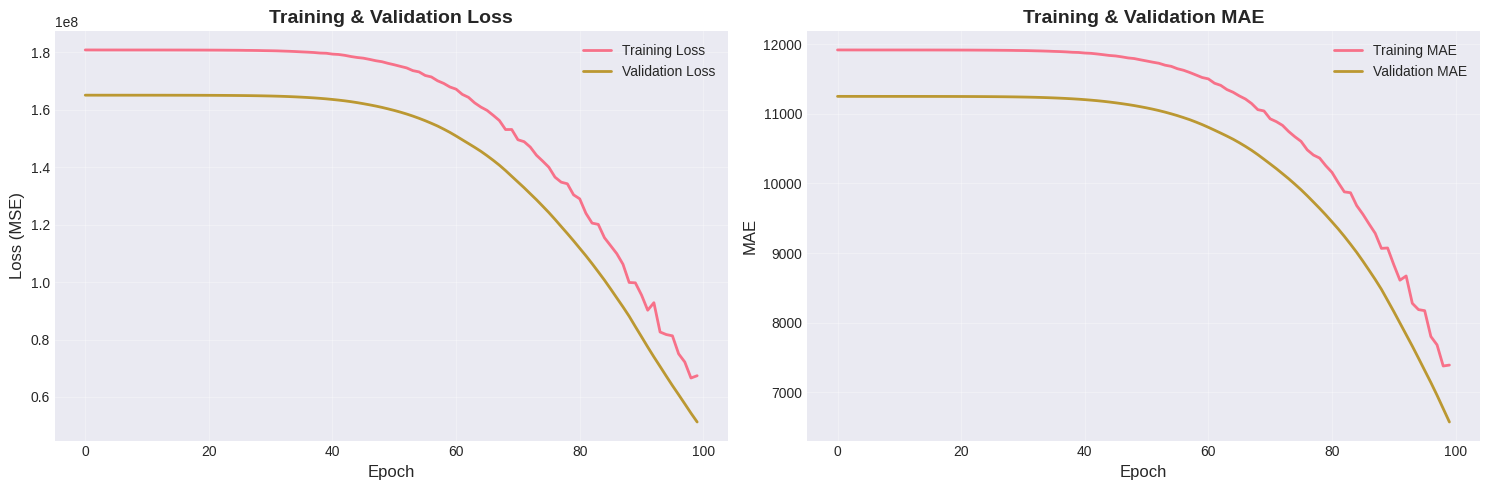

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAE
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Training & Validation MAE', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

CELL 14: Perbandingan Model

PERBANDINGAN MODEL
            Model   Test RMSE   Test R²   Test MAE
Linear Regression 2342.045933  0.578273 1857.25771
    Random Forest 1696.532870  0.778708 1186.26362
    Deep Learning 7111.021806 -2.887808 6633.24896


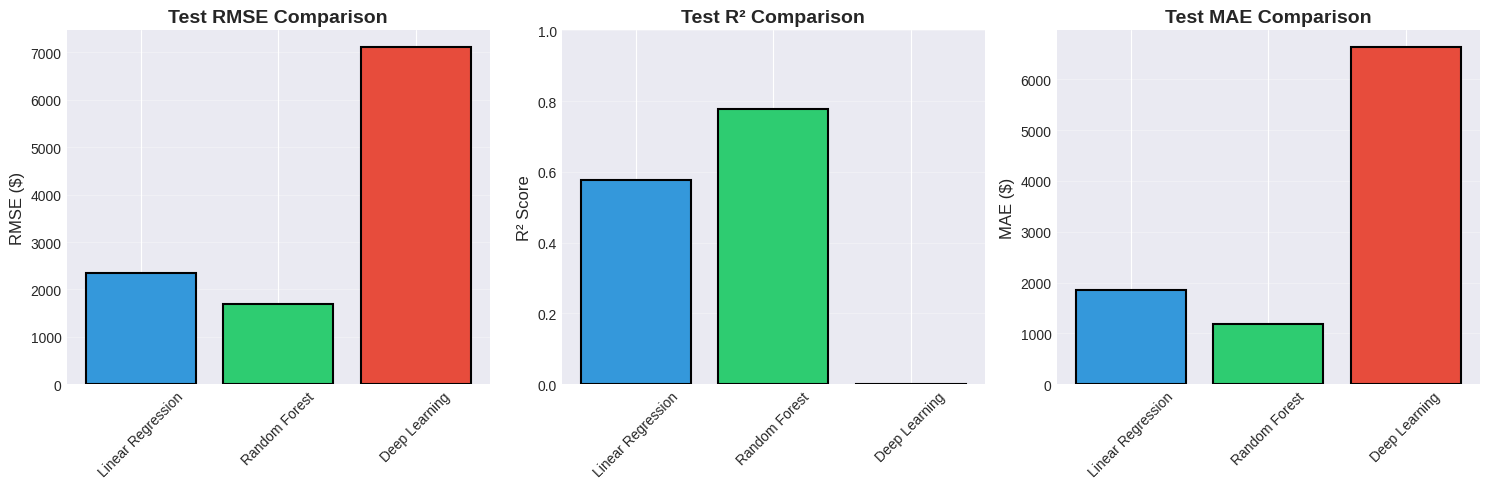

In [24]:
# Create comparison dataframe
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Deep Learning'],
    'Test RMSE': [lr_test_rmse, rf_test_rmse, dl_test_rmse],
    'Test R²': [lr_test_r2, rf_test_r2, dl_test_r2],
    'Test MAE': [lr_test_mae, rf_test_mae, dl_test_mae]
}

results_df = pd.DataFrame(results)
print("="*60)
print("PERBANDINGAN MODEL")
print("="*60)
print(results_df.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = results['Model']

# RMSE
axes[0].bar(models, results['Test RMSE'],
           color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('RMSE ($)', fontsize=12)
axes[0].set_title('Test RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3, axis='y')

# R²
axes[1].bar(models, results['Test R²'],
           color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_title('Test R² Comparison', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([0, 1])
axes[1].grid(alpha=0.3, axis='y')

# MAE
axes[2].bar(models, results['Test MAE'],
           color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
axes[2].set_ylabel('MAE ($)', fontsize=12)
axes[2].set_title('Test MAE Comparison', fontsize=14, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

CELL 15: Kesimpulan

In [25]:
best_model_idx = results_df['Test RMSE'].idxmin()
best_model = results_df.loc[best_model_idx, 'Model']

print("\n" + "="*60)
print("KESIMPULAN")
print("="*60)
print(f"\n🏆 Model Terbaik: {best_model}")
print(f"   Test RMSE: ${results_df.loc[best_model_idx, 'Test RMSE']:,.2f}")
print(f"   Test R²: {results_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"   Test MAE: ${results_df.loc[best_model_idx, 'Test MAE']:,.2f}")
print("\n" + "="*60)


KESIMPULAN

🏆 Model Terbaik: Random Forest
   Test RMSE: $1,696.53
   Test R²: 0.7787
   Test MAE: $1,186.26

